In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("OneDrive/Desktop/Data/AAPL.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-16,29.062500,29.135000,28.860001,29.102501,26.894033,148694000
1,2015-09-17,28.915001,29.122499,28.430000,28.480000,26.318771,256450400
2,2015-09-18,28.052500,28.575001,27.967501,28.362499,26.210186,297141200
3,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.616798,200888000
4,2015-09-22,28.344999,28.545000,28.129999,28.350000,26.198639,201384800


In [3]:
df.set_index("Date", drop=True,inplace =True)

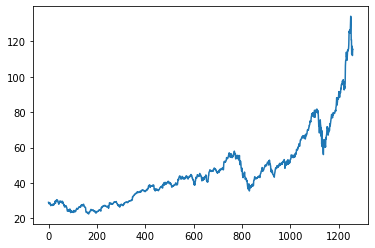

In [4]:
df1 = df.reset_index()[['Close']]
plt.plot(df1)

In [5]:
type(df1)
df=df1

In [7]:
df["returns"] = df.Close.pct_change()
df.head()
df["log_returns"]= np.log(1+df["returns"])

In [8]:
df.dropna(inplace=True)


In [9]:
X = df[["Close", "log_returns"]].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled =scaler.transform(X)
X_scaled[:10]

array([[0.05282496, 0.46274201],
       [0.05177204, 0.5324517 ],
       [0.05571487, 0.61029678],
       [0.05166003, 0.48580963],
       [0.05372106, 0.58114079],
       [0.05524442, 0.57257227],
       [0.05459475, 0.53886688],
       [0.04950941, 0.46925788],
       [0.04193737, 0.42726643],
       [0.04471529, 0.59399894]])

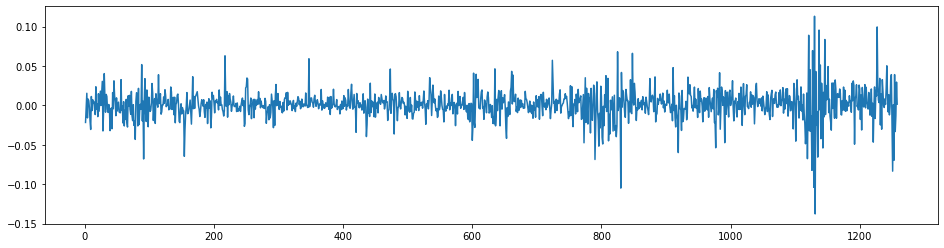

In [12]:
plt.figure(1, figsize= (16,4))
plt.plot(df.log_returns)

In [13]:
y = [X[0] for X in X_scaled]
y[:5]

[0.0528249591554259,
 0.05177203558073579,
 0.05571487373349382,
 0.051660032348762874,
 0.05372105669901284]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_vali,y_train,y_vali = train_test_split(X_scaled,y, test_size=0.2)

In [63]:
X_valid = X_vali[:221,:]
y_valid = y_vali[:221]
X_test = X_vali[222:,:]
y_test = y_vali[222:]

In [64]:
n=10;
Xtrain=[]
Ytrain=[]
Xvalid=[]
Yvalid=[]
Xtest=[]
Ytest=[]



In [65]:
for i in range(n,len(X_train)):
    Xtrain.append(X_train[i-n : i, : X_train.shape[1]])
    Ytrain.append(y_train[i])
    
for i in range(n,len(X_test)):
    Xtest.append(X_test[i-n : i, : X_test.shape[1]])
    Ytest.append(y_test[i])
    
for i in range(n,len(X_valid)):
    Xvalid.append(X_valid[i-n : i, : X_valid.shape[1]])
    Yvalid.append(y_valid[i])
    


In [66]:
Xtrain, Ytrain = (np.array(Xtrain),np.array(Ytrain))
Xtrain= np.reshape(Xtrain, (Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))


In [68]:
Xtest,Ytest = (np.array(Xtest),np.array(Ytest))
Xtest= np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

In [69]:
Xvalid,Yvalid = (np.array(Xvalid),np.array(Yvalid))
Xvalid= np.reshape(Xvalid, (Xvalid.shape[0],Xvalid.shape[1],Xvalid.shape[2]))

In [71]:
X_test.shape, X_train.shape, X_valid.shape

((30, 2), (1006, 2), (221, 2))

In [72]:
Xtrain.shape,Xtest.shape,Xvalid.shape

((996, 10, 2), (20, 10, 2), (211, 10, 2))

In [73]:
## LSTM mode

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,2)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [77]:
model.fit(Xtrain,Ytrain,epochs= 30, validation_data=(Xvalid,Yvalid),batch_size= 20,verbose=1)

Train on 996 samples, validate on 211 samples
Epoch 1/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0342 - val_loss: 0.0303
Epoch 2/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0343 - val_loss: 0.0305
Epoch 3/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0339 - val_loss: 0.0303
Epoch 4/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0340 - val_loss: 0.0310
Epoch 5/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0339 - val_loss: 0.0304
Epoch 6/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0342 - val_loss: 0.0303
Epoch 7/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0338 - val_loss: 0.0304
Epoch 8/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0338 - val_loss: 0.0306
Epoch 9/30
996/996 [==============================] - 1s 1ms/step - loss: 0.0338 - val_loss: 0.0309
Epoch 10/30
996/996 [==============================] -

In [80]:
train_pred = model.predict(Xtrain)
test_pred =  model.predict(Xtest)
train_pred = np.c_[train_pred,np.zeros(train_pred.shape)]
test_pred = np.c_[test_pred,np.zeros(test_pred.shape)]


In [81]:
trainPredict = scaler.inverse_transform(train_pred)
trainpred = [x[0] for x in trainPredict]
testPredict = scaler.inverse_transform(test_pred)
testpred = [x[0] for x in testPredict]

In [83]:
print(testpred[:10])
print(testpred)

[48.94145729121086, 49.04358897595361, 49.052704966310834, 48.91031459376285, 48.84512245841727, 48.72276997054723, 48.68894336057887, 48.95578479447934, 48.96654039930067, 48.785738815285804]
[48.94145729121086, 49.04358897595361, 49.052704966310834, 48.91031459376285, 48.84512245841727, 48.72276997054723, 48.68894336057887, 48.95578479447934, 48.96654039930067, 48.785738815285804, 48.555412892559026, 48.55105943346468, 48.91715075508326, 48.861327370134, 48.914511740727754, 48.98559717593214, 48.923797346374364, 48.79753372947839, 48.51257505461806, 48.5447404324874]


In [84]:
from sklearn.metrics import mean_squared_error

In [94]:
print("Root mean Square error= ")
testScore = mean_squared_error([x[0][0] for x in Xtest], testpred,squared=False)
testScore

Root mean Square error= 


48.651253415653166

2